In [1]:
import pandas as pd

# Define an empty list to store DataFrames
all_data = []

# Loop through all CSV filenames
filenames = ["SCATSApril2023.csv", "SCATSAugust2023.csv", "SCATSDecember2023.csv",
              "SCATSFebruary2023.csv", "SCATSJanuary2023.csv", "SCATSJuly2023.csv",
              "SCATSJune2023.csv", "SCATSMarch2023.csv", "SCATSMay2023.csv",
              "SCATSNovember2023.csv", "SCATSOctober2023.csv", "SCATSSeptember2023.csv"]

for filename in filenames:
  # Read the CSV data into a DataFrame
  df = pd.read_csv(filename)
  # Append the DataFrame to the list
  all_data.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(all_data, ignore_index=True)

# Print the combined DataFrame (optional)
print(combined_df)
combined_df.to_csv('traffic_data.csv',index=False)

                 End_Time  Region  Site  Detector  Sum_Volume  Avg_Volume  \
0          20230401140000     IRE  6291         4          16           1   
1          20230401140000     IRE  6291         5         388          32   
2          20230401140000     IRE  6291         6           0           0   
3          20230401140000     IRE  6297         1          85           7   
4          20230401140000     IRE  6297         2         392          32   
...                   ...     ...   ...       ...         ...         ...   
123401967  20230929230000  WCITY1    71         5          90           7   
123401968  20230929230000  WCITY1    71         6         128          10   
123401969  20230929230000  WCITY1    71         7           0           0   
123401970  20230929230000  WCITY1    71         8           0           0   
123401971  20230929230000  WCITY1    71         9           0           0   

           Weighted_Avg  Weighted_Var  Weighted_Std_Dev  
0                

In [2]:
combined_df['End_Time'] = combined_df['End_Time'].astype(str)

# Convert 'End_Time' to datetime format
combined_df['End_Time'] = pd.to_datetime(combined_df['End_Time'], format='%Y%m%d%H%M%S')

# Rename the column from 'End_Time' to 'date'
combined_df.rename(columns={'End_Time': 'date'}, inplace=True)

# Example output
print(combined_df.head())

                 date Region  Site  Detector  Sum_Volume  Avg_Volume  \
0 2023-04-01 14:00:00    IRE  6291         4          16           1   
1 2023-04-01 14:00:00    IRE  6291         5         388          32   
2 2023-04-01 14:00:00    IRE  6291         6           0           0   
3 2023-04-01 14:00:00    IRE  6297         1          85           7   
4 2023-04-01 14:00:00    IRE  6297         2         392          32   

   Weighted_Avg  Weighted_Var  Weighted_Std_Dev  
0           NaN           NaN               NaN  
1           NaN           NaN               NaN  
2           NaN           NaN               NaN  
3           NaN           NaN               NaN  
4           NaN           NaN               NaN  


In [3]:
# Rename the 'Site' column to 'siteID'
combined_df.rename(columns={'Site': 'SiteID'}, inplace=True)

# Example output to verify the change
print(combined_df.head())

                 date Region  SiteID  Detector  Sum_Volume  Avg_Volume  \
0 2023-04-01 14:00:00    IRE    6291         4          16           1   
1 2023-04-01 14:00:00    IRE    6291         5         388          32   
2 2023-04-01 14:00:00    IRE    6291         6           0           0   
3 2023-04-01 14:00:00    IRE    6297         1          85           7   
4 2023-04-01 14:00:00    IRE    6297         2         392          32   

   Weighted_Avg  Weighted_Var  Weighted_Std_Dev  
0           NaN           NaN               NaN  
1           NaN           NaN               NaN  
2           NaN           NaN               NaN  
3           NaN           NaN               NaN  
4           NaN           NaN               NaN  


In [4]:
dcc_data = pd.read_csv('dcc_traffic_signals_20221130.csv')
dcc_data.head()

,SiteID,Site_Description_Cap,Site_Description_Lower,Region,Lat,Long,Site_Type
0,1,ABBEY ST @ MARLBOROUGH ST (LUAS),abbey st @ marlborough st (luas),CCITY,53.348754,-6.257607,SCATS Site
1,2,AMIENS ST @ SEVILLE PL,amiens st @ seville pl,CCITY,53.354711,-6.246679,SCATS Site
2,3,AMIENS ST @ TALBOT ST,amiens st @ talbot st,CCITY,53.351374,-6.250073,SCATS Site
3,4,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
4,5,NCR @ AUGHRIM ST,ncr @ aughrim st,WCITY1,53.355797,-6.292406,SCATS Site


In [5]:
# Merge the dataframes on the 'siteID' and 'SiteID' columns
# Assuming 'siteID' in combined_df and 'SiteID' in dcc_data are the columns to join on
merged_df = pd.merge(combined_df, dcc_data, left_on='SiteID', right_on='SiteID', how='left')

# Display the first few rows of the merged dataframe to verify
print(merged_df.tail())

                         date Region_x  SiteID  Detector  Sum_Volume  \
123688797 2023-09-29 23:00:00   WCITY1      71         5          90   
123688798 2023-09-29 23:00:00   WCITY1      71         6         128   
123688799 2023-09-29 23:00:00   WCITY1      71         7           0   
123688800 2023-09-29 23:00:00   WCITY1      71         8           0   
123688801 2023-09-29 23:00:00   WCITY1      71         9           0   

           Avg_Volume  Weighted_Avg  Weighted_Var  Weighted_Std_Dev  \
123688797           7           NaN           NaN               NaN   
123688798          10           NaN           NaN               NaN   
123688799           0           NaN           NaN               NaN   
123688800           0           NaN           NaN               NaN   
123688801           0           NaN           NaN               NaN   

               Site_Description_Cap    Site_Description_Lower Region_y  \
123688797  EMMET RD @ TYRCONNELL RD  emmet rd @ tyrconnell rd   WC

In [6]:
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Remove rows where site_description_cap is null or NaN
merged_df = merged_df.dropna(subset=['Site_Description_Cap'])

# If you want to remove rows where site_description_cap is an empty string as well
# df_cleaned = df[df['site_description_cap'].notnull() & (df['site_description_cap'] != '')]

# Display the cleaned DataFrame
print(merged_df.tail())

                         date Region_x  SiteID  Detector  Sum_Volume  \
123688797 2023-09-29 23:00:00   WCITY1      71         5          90   
123688798 2023-09-29 23:00:00   WCITY1      71         6         128   
123688799 2023-09-29 23:00:00   WCITY1      71         7           0   
123688800 2023-09-29 23:00:00   WCITY1      71         8           0   
123688801 2023-09-29 23:00:00   WCITY1      71         9           0   

           Avg_Volume  Weighted_Avg  Weighted_Var  Weighted_Std_Dev  \
123688797           7           NaN           NaN               NaN   
123688798          10           NaN           NaN               NaN   
123688799           0           NaN           NaN               NaN   
123688800           0           NaN           NaN               NaN   
123688801           0           NaN           NaN               NaN   

               Site_Description_Cap    Site_Description_Lower Region_y  \
123688797  EMMET RD @ TYRCONNELL RD  emmet rd @ tyrconnell rd   WC

In [7]:
print(merged_df.head())

                   date Region_x  SiteID  Detector  Sum_Volume  Avg_Volume  \
119 2023-04-01 16:00:00    NCITY       4         2         124          10   
120 2023-04-01 16:00:00    NCITY       4         3         122          10   
121 2023-04-01 16:00:00    NCITY       4         4           8           0   
122 2023-04-01 16:00:00    NCITY       4         5          90           7   
123 2023-04-01 16:00:00    NCITY       4         6           0           0   

     Weighted_Avg  Weighted_Var  Weighted_Std_Dev      Site_Description_Cap  \
119           NaN           NaN               NaN  ANNESLEY PL @ POPLAR ROW   
120           NaN           NaN               NaN  ANNESLEY PL @ POPLAR ROW   
121           NaN           NaN               NaN  ANNESLEY PL @ POPLAR ROW   
122           NaN           NaN               NaN  ANNESLEY PL @ POPLAR ROW   
123           NaN           NaN               NaN  ANNESLEY PL @ POPLAR ROW   

       Site_Description_Lower Region_y        Lat      L

In [8]:
weather_data = pd.read_csv('hly175.csv')
weather_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,16-Aug-2003 1:00,0,0.0,0,9.2,0,8.9,8.5,11.1,95.0,1021.9
1,16-Aug-2003 2:00,0,0.0,0,9.0,0,8.7,8.5,11.1,96.0,1021.7
2,16-Aug-2003 3:00,0,0.0,0,8.2,0,8.0,7.7,10.5,96.0,1021.2
3,16-Aug-2003 4:00,0,0.0,0,8.4,0,8.1,7.9,10.7,97.0,1021.2
4,16-Aug-2003 5:00,0,0.0,0,7.7,0,7.5,7.3,10.2,97.0,1021.1


In [9]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Filter rows where the year is 2023
filtered_data = weather_data[weather_data['date'].dt.year == 2023]

print(filtered_data)

                      date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
169871 2023-01-01 00:00:00    0   0.3      0   6.8      0   6.2    5.5    9.0   
169872 2023-01-01 01:00:00    0   0.0      0   6.2      0   5.3    4.1    8.2   
169873 2023-01-01 02:00:00    0   0.0      0   4.5      0   3.9    3.1    7.7   
169874 2023-01-01 03:00:00    0   0.1      0   4.0      0   3.6    3.1    7.6   
169875 2023-01-01 04:00:00    0   0.0      0   2.5      0   2.3    2.0    7.0   
...                    ...  ...   ...    ...   ...    ...   ...    ...    ...   
178626 2023-12-31 19:00:00    0   0.5      0   6.8      0   6.0    4.9    8.7   
178627 2023-12-31 20:00:00    0   0.0      0   6.6      0   5.7    4.6    8.5   
178628 2023-12-31 21:00:00    0   0.0      0   6.4      0   5.4    4.0    8.1   
178629 2023-12-31 22:00:00    0   0.0      0   6.0      0   5.0    3.6    7.9   
178630 2023-12-31 23:00:00    0   0.0      0   6.1      0   5.0    3.5    7.9   

        rhum    msl  
16987

In [10]:
merged_df.to_csv('traffic_data.csv',index=False)
filtered_data.to_csv('weather_data.csv',index=False)

In [11]:
merged_df

,date,Region_x,SiteID,Detector,Sum_Volume,Avg_Volume,Weighted_Avg,Weighted_Var,Weighted_Std_Dev,Site_Description_Cap,Site_Description_Lower,Region_y,Lat,Long,Site_Type
119,2023-04-01 16:00:00,NCITY,4,2,124,10,NaN,NaN,NaN,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
120,2023-04-01 16:00:00,NCITY,4,3,122,10,NaN,NaN,NaN,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
121,2023-04-01 16:00:00,NCITY,4,4,8,0,NaN,NaN,NaN,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
122,2023-04-01 16:00:00,NCITY,4,5,90,7,NaN,NaN,NaN,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
123,2023-04-01 16:00:00,NCITY,4,6,0,0,NaN,NaN,NaN,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123688797,2023-09-29 23:00:00,WCITY1,71,5,90,7,NaN,NaN,NaN,EMMET RD @ TYRCONNELL RD,emmet rd @ tyrconnell rd,WCITY1,53.339541,-6.321016,SCATS Site
123688798,2023-09-29 23:00:00,WCITY1,71,6,128,10,NaN,NaN,NaN,EMMET RD @ TYRCONNELL RD,emmet rd @ tyrconnell rd,WCITY1,53.339541,-6.321016,SCATS Site
123688799,2023-09-29 23:00:00,WCITY1,71,7,0,0,NaN,NaN,NaN,EMMET RD @ TYRCONNELL RD,emmet rd @ tyrconnell rd,WCITY1,53.339541,-6.321016,SCATS Site
123688800,2023-09-29 23:00:00,WCITY1,71,8,0,0,NaN,NaN,NaN,EMMET RD @ TYRCONNELL RD,emmet rd @ tyrconnell rd,WCITY1,53.339541,-6.321016,SCATS Site


In [12]:
filtered_data

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
169871,2023-01-01 00:00:00,0,0.3,0,6.8,0,6.2,5.5,9.0,91.0,995.2
169872,2023-01-01 01:00:00,0,0.0,0,6.2,0,5.3,4.1,8.2,86.0,995.3
169873,2023-01-01 02:00:00,0,0.0,0,4.5,0,3.9,3.1,7.7,91.0,996.1
169874,2023-01-01 03:00:00,0,0.1,0,4.0,0,3.6,3.1,7.6,93.0,996.8
169875,2023-01-01 04:00:00,0,0.0,0,2.5,0,2.3,2.0,7.0,96.0,997.0
...,...,...,...,...,...,...,...,...,...,...,...
178626,2023-12-31 19:00:00,0,0.5,0,6.8,0,6.0,4.9,8.7,88.0,988.0
178627,2023-12-31 20:00:00,0,0.0,0,6.6,0,5.7,4.6,8.5,87.0,989.3
178628,2023-12-31 21:00:00,0,0.0,0,6.4,0,5.4,4.0,8.1,84.0,990.4
178629,2023-12-31 22:00:00,0,0.0,0,6.0,0,5.0,3.6,7.9,84.0,991.3


In [13]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Urban Traffic and Weather Analysis") \
    .getOrCreate()

# Read data from HDFS
traffic_df = spark.read.csv("traffic_data.csv", header=True, inferSchema=True)
weather_df = spark.read.csv("weather_data.csv", header=True, inferSchema=True)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/12 02:27:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [14]:
# Show the first few rows of the traffic DataFrame
traffic_df.show(n=100)

# Show the first few rows of the weather DataFrame
weather_df.show(n=5)

+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+
|               date|Region_x|SiteID|Detector|Sum_Volume|Avg_Volume|Weighted_Avg|Weighted_Var|Weighted_Std_Dev|Site_Description_Cap|Site_Description_Lower|Region_y|        Lat|        Long| Site_Type|
+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+
|2023-04-01 16:00:00|   NCITY|     4|       2|       124|        10|        NULL|        NULL|            NULL|ANNESLEY PL @ POP...|  annesley pl @ pop...|   NCITY|  53.361145|   -6.240513|SCATS Site|
|2023-04-01 16:00:00|   NCITY|     4|       3|       122|        10|        NULL|        NULL|            NULL|ANNESLEY PL @ POP...|  annesley pl @ pop...|   NCITY|  53.361145|   -6.240513|SCATS S

+-------------------+---+----+-----+----+-----+----+-----+-----+----+-----+
|               date|ind|rain|ind.1|temp|ind.2|wetb|dewpt|vappr|rhum|  msl|
+-------------------+---+----+-----+----+-----+----+-----+-----+----+-----+
|2023-01-01 00:00:00|  0| 0.3|    0| 6.8|    0| 6.2|  5.5|  9.0|91.0|995.2|
|2023-01-01 01:00:00|  0| 0.0|    0| 6.2|    0| 5.3|  4.1|  8.2|86.0|995.3|
|2023-01-01 02:00:00|  0| 0.0|    0| 4.5|    0| 3.9|  3.1|  7.7|91.0|996.1|
|2023-01-01 03:00:00|  0| 0.1|    0| 4.0|    0| 3.6|  3.1|  7.6|93.0|996.8|
|2023-01-01 04:00:00|  0| 0.0|    0| 2.5|    0| 2.3|  2.0|  7.0|96.0|997.0|
+-------------------+---+----+-----+----+-----+----+-----+-----+----+-----+
only showing top 5 rows



In [15]:
from pyspark.sql.functions import col, to_timestamp


# Join DataFrames on the 'date' column
combined_df = traffic_df.join(weather_df, "date", "left_outer")

In [16]:
combined_df.show(n=50)

+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+---+----+-----+----+-----+----+-----+-----+----+------+
|               date|Region_x|SiteID|Detector|Sum_Volume|Avg_Volume|Weighted_Avg|Weighted_Var|Weighted_Std_Dev|Site_Description_Cap|Site_Description_Lower|Region_y|        Lat|        Long| Site_Type|ind|rain|ind.1|temp|ind.2|wetb|dewpt|vappr|rhum|   msl|
+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+---+----+-----+----+-----+----+-----+-----+----+------+
|2023-04-01 16:00:00|   NCITY|     4|       2|       124|        10|        NULL|        NULL|            NULL|ANNESLEY PL @ POP...|  annesley pl @ pop...|   NCITY|  53.361145|   -6.240513|SCATS Site|  0| 0.5|    0|10.5|    0| 9.9| 

In [17]:
combined_df.show(n=100)

+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+---+----+-----+----+-----+----+-----+-----+----+------+
|               date|Region_x|SiteID|Detector|Sum_Volume|Avg_Volume|Weighted_Avg|Weighted_Var|Weighted_Std_Dev|Site_Description_Cap|Site_Description_Lower|Region_y|        Lat|        Long| Site_Type|ind|rain|ind.1|temp|ind.2|wetb|dewpt|vappr|rhum|   msl|
+-------------------+--------+------+--------+----------+----------+------------+------------+----------------+--------------------+----------------------+--------+-----------+------------+----------+---+----+-----+----+-----+----+-----+-----+----+------+
|2023-04-01 16:00:00|   NCITY|     4|       2|       124|        10|        NULL|        NULL|            NULL|ANNESLEY PL @ POP...|  annesley pl @ pop...|   NCITY|  53.361145|   -6.240513|SCATS Site|  0| 0.5|    0|10.5|    0| 9.9| 

In [18]:
# Assuming you have your Spark session already, spark
from pyspark.sql import SparkSession

# Enable SQL queries
spark.sql("USE default")

# Create a temporary view of your DataFrame
combined_df.createOrReplaceTempView("traffic_weather_data")


In [28]:
# Average volume by region and site
avg_volume_query = """
SELECT Region_x AS Region, siteID, AVG(Sum_Volume) AS avg_volume
FROM traffic_weather_data
GROUP BY Region_x, siteID
ORDER BY avg_volume DESC
"""
avg_volume_results = spark.sql(avg_volume_query)
avg_volume_results.show()

# Correlation between weather conditions and traffic volume
correlation_query = """
SELECT date, AVG(rain) AS avg_rain, AVG(Sum_Volume) AS avg_traffic_volume
FROM traffic_weather_data
GROUP BY date
ORDER BY date
"""
correlation_results = spark.sql(correlation_query)
correlation_results.show()

# Daily maximum and minimum temperatures and their corresponding traffic volumes
temp_traffic_query = """
SELECT date, MAX(temp) AS max_temp, MIN(temp) AS min_temp, SUM(Sum_Volume) AS total_traffic
FROM traffic_weather_data
GROUP BY date
ORDER BY date
"""
temp_traffic_results = spark.sql(temp_traffic_query)
temp_traffic_results.show()

+------+------+------------------+
|Region|siteID|        avg_volume|
+------+------+------------------+
|  DCC1|   961| 516.3290344670166|
| NCITY|   556|385.50470547228997|
| NCITY|   822| 385.0882467161622|
| NCITY|   888|349.04445723053317|
| NCITY|   890| 324.7276401179941|
| CCITY|   438|317.80979563877156|
| NCITY|   901| 303.6416652231653|
| NCITY|   150|295.86677327241574|
| CCITY|   628|283.98175076762647|
| NCITY|   750|277.39921228558103|
| NCITY|    67| 270.2582695748163|
| NCITY|   571|253.14889579020013|
| NCITY|   691|252.40045677743518|
|WCITY1|   532|248.93641552511414|
| NCITY|    61|244.44427315290625|
|WCITY1|    86|239.17294207832614|
| CCITY|   305|232.86683789954338|
| SCITY|    24| 229.3848348592376|
| NCITY|    65|222.77490080168434|
| SCITY|   295| 222.4561428169806|
+------+------+------------------+
only showing top 20 rows



+-------------------+-------------------+------------------+
|               date|           avg_rain|avg_traffic_volume|
+-------------------+-------------------+------------------+
|2023-01-01 00:00:00| 0.3000000000000355| 20.05853462964819|
|2023-01-01 01:00:00|                0.0| 21.83131323249524|
|2023-01-01 02:00:00|                0.0| 22.32889467360833|
|2023-01-01 03:00:00|0.10000000000001588|19.585585585585587|
|2023-01-01 04:00:00|                0.0|17.527927927927927|
|2023-01-01 05:00:00|                0.0|13.697097097097098|
|2023-01-01 06:00:00|                0.0|12.856856856856856|
|2023-01-01 07:00:00|                0.0|12.486786786786787|
|2023-01-01 08:00:00|                0.0|14.883949133874037|
|2023-01-01 09:00:00|0.10000000000001585|14.933607874648454|
|2023-01-01 10:00:00|0.10000000000001587|  18.0057119951899|
|2023-01-01 11:00:00|0.10000000000001587|23.729767628205128|
|2023-01-01 12:00:00|                0.0|30.102512764040444|
|2023-01-01 13:00:00|   

+-------------------+--------+--------+-------------+
|               date|max_temp|min_temp|total_traffic|
+-------------------+--------+--------+-------------+
|2023-01-01 00:00:00|     6.8|     6.8|       200124|
|2023-01-01 01:00:00|     6.2|     6.2|       217942|
|2023-01-01 02:00:00|     4.5|     4.5|       223021|
|2023-01-01 03:00:00|     4.0|     4.0|       195660|
|2023-01-01 04:00:00|     2.5|     2.5|       175104|
|2023-01-01 05:00:00|     1.9|     1.9|       136834|
|2023-01-01 06:00:00|     3.0|     3.0|       128440|
|2023-01-01 07:00:00|     3.4|     3.4|       124743|
|2023-01-01 08:00:00|     4.5|     4.5|       148646|
|2023-01-01 09:00:00|     5.0|     5.0|       148679|
|2023-01-01 10:00:00|     5.9|     5.9|       179679|
|2023-01-01 11:00:00|     5.6|     5.6|       236918|
|2023-01-01 12:00:00|     6.2|     6.2|       300694|
|2023-01-01 13:00:00|     6.4|     6.4|       379997|
|2023-01-01 14:00:00|     5.9|     5.9|       432785|
|2023-01-01 15:00:00|     5.

In [31]:
correlation_query = """
SELECT date, AVG(rain) AS avg_rain, AVG(Sum_Volume) AS avg_traffic_volume
FROM traffic_weather_data
GROUP BY date
ORDER BY date
"""
correlation_results = spark.sql(correlation_query)
correlation_results.show()

# SQL Query to find daily maximum and minimum temperatures and total traffic volume
temp_traffic_query = """
SELECT date, MAX(temp) AS max_temp, MIN(temp) AS min_temp, SUM(Sum_Volume) AS total_traffic
FROM traffic_weather_data
GROUP BY date
ORDER BY date
"""
temp_traffic_results = spark.sql(temp_traffic_query)
temp_traffic_results.show()

# Assuming correlation_results and temp_traffic_results are DataFrames
# and you want to join them on 'date' to create combined_df
combined_df = correlation_results.join(temp_traffic_results, "date")
combined_df.show()

+-------------------+-------------------+------------------+
|               date|           avg_rain|avg_traffic_volume|
+-------------------+-------------------+------------------+
|2023-01-01 00:00:00| 0.3000000000000355| 20.05853462964819|
|2023-01-01 01:00:00|                0.0| 21.83131323249524|
|2023-01-01 02:00:00|                0.0| 22.32889467360833|
|2023-01-01 03:00:00|0.10000000000001588|19.585585585585587|
|2023-01-01 04:00:00|                0.0|17.527927927927927|
|2023-01-01 05:00:00|                0.0|13.697097097097098|
|2023-01-01 06:00:00|                0.0|12.856856856856856|
|2023-01-01 07:00:00|                0.0|12.486786786786787|
|2023-01-01 08:00:00|                0.0|14.883949133874037|
|2023-01-01 09:00:00|0.10000000000001585|14.933607874648454|
|2023-01-01 10:00:00|0.10000000000001587|  18.0057119951899|
|2023-01-01 11:00:00|0.10000000000001587|23.729767628205128|
|2023-01-01 12:00:00|                0.0|30.102512764040444|
|2023-01-01 13:00:00|   

+-------------------+--------+--------+-------------+
|               date|max_temp|min_temp|total_traffic|
+-------------------+--------+--------+-------------+
|2023-01-01 00:00:00|     6.8|     6.8|       200124|
|2023-01-01 01:00:00|     6.2|     6.2|       217942|
|2023-01-01 02:00:00|     4.5|     4.5|       223021|
|2023-01-01 03:00:00|     4.0|     4.0|       195660|
|2023-01-01 04:00:00|     2.5|     2.5|       175104|
|2023-01-01 05:00:00|     1.9|     1.9|       136834|
|2023-01-01 06:00:00|     3.0|     3.0|       128440|
|2023-01-01 07:00:00|     3.4|     3.4|       124743|
|2023-01-01 08:00:00|     4.5|     4.5|       148646|
|2023-01-01 09:00:00|     5.0|     5.0|       148679|
|2023-01-01 10:00:00|     5.9|     5.9|       179679|
|2023-01-01 11:00:00|     5.6|     5.6|       236918|
|2023-01-01 12:00:00|     6.2|     6.2|       300694|
|2023-01-01 13:00:00|     6.4|     6.4|       379997|
|2023-01-01 14:00:00|     5.9|     5.9|       432785|
|2023-01-01 15:00:00|     5.

+-------------------+-------------------+------------------+--------+--------+-------------+
|               date|           avg_rain|avg_traffic_volume|max_temp|min_temp|total_traffic|
+-------------------+-------------------+------------------+--------+--------+-------------+
|2023-04-30 23:00:00|                0.0|28.901972564333633|    11.4|    11.4|       288644|
|2023-04-10 06:00:00|                0.0|10.321503759398496|     8.0|     8.0|       102957|
|2023-04-10 11:00:00|                0.0| 35.23659242984121|     9.9|     9.9|       352824|
|2023-04-04 01:00:00|                0.0|12.114325758334168|     6.0|     6.0|       121010|
|2023-04-26 07:00:00|                0.0|41.627298444130126|     8.8|     8.8|       412027|
|2023-04-26 10:00:00|                0.0| 64.02604585679806|    12.0|    12.0|       636675|
|2023-04-16 08:00:00|                0.0| 19.38992201559688|    12.7|    12.7|       193938|
|2023-04-28 06:00:00|                0.0| 16.77108914844764|    10.2| 

In [32]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Assemble features
assembler = VectorAssembler(inputCols=["avg_rain", "max_temp", "min_temp"], outputCol="features")
training_data = assembler.transform(combined_df)

# Split data into training and test sets
train_data, test_data = training_data.randomSplit([0.8, 0.2], seed=42)

# Initialize and train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='total_traffic')
lr_model = lr.fit(train_data)

# Evaluate model on test data
test_results = lr_model.evaluate(test_data)
print("RMSE:", test_results.rootMeanSquaredError)

24/04/12 02:45:40 WARN Instrumentation: [773e1a23] regParam is zero, which might cause numerical instability and overfitting.
24/04/12 02:45:41 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/12 02:45:41 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


RMSE: 203247.2598199285


In [36]:
combined_df

DataFrame[date: timestamp, avg_rain: double, avg_traffic_volume: double, max_temp: double, min_temp: double, total_traffic: bigint]

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

# Assuming 'combined_df' contains the dataset with relevant features and 'Sum_Volume' as the target variable

# Step 1: Data Preparation
# Convert Spark DataFrame to Pandas DataFrame for use with Scikit-Learn and Keras
pandas_df = combined_df.toPandas()

# Extract features and target variable
# Here we choose 'total_traffic' as the target based on your schema, update if another target is needed
X = pandas_df[['avg_rain', 'max_temp', 'min_temp']].values
y = pandas_df['total_traffic'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Step 2: Model Development
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Model Training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4: Model Evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Epoch 1/50


/Users/raphaelbyrne/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 205861896192.0000 - val_loss: 209641242624.0000
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 204991807488.0000 - val_loss: 209633460224.0000
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 208409067520.0000 - val_loss: 209616764928.0000
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 206035828736.0000 - val_loss: 209591664640.0000
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 207157002240.0000 - val_loss: 209560207360.0000
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 211014909952.0000 - val_loss: 209523687424.0000
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 208891871232.0000 - val_loss: 209482694656.0000
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 206349484032.0000 - val_loss: 209437507584.0000
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 210092621824.0000 - val_loss: 209388584960.0000
Epoch 10/50
176/176 ━━━

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Reshape the data for non-LSTM models
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Alternative Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)  # Use reshaped data here
lr_y_pred = lr_model.predict(X_test_flat)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Linear Regression Metrics:")
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)
print("R-squared (R2):", lr_r2)

# Alternative Model: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)  # Use reshaped data here
rf_y_pred = rf_model.predict(X_test_flat)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Metrics:")
print("Root Mean Squared Error:", rf_rmse)
print("Mean Absolute Error:", rf_mae)
print("R-squared (R2):", rf_r2)

Linear Regression Metrics:
Root Mean Squared Error: 197063.0406863475
Mean Absolute Error: 172195.18448483554
R-squared (R2): 0.07456041547939718

Random Forest Metrics:
Root Mean Squared Error: 203313.46932474768
Mean Absolute Error: 173503.21102745383
R-squared (R2): 0.014923372230174703


In [41]:
# Flatten the input features to two dimensions for scikit-learn models
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Set up the Gradient Boosting model with GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=3, scoring='neg_mean_squared_error')
gb_grid.fit(X_train_flat, y_train)  # Use the reshaped flat array
gb_best = gb_grid.best_estimator_
gb_y_pred = gb_best.predict(X_test_flat)  # Use the reshaped flat array for prediction
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Output the results
print("Gradient Boosting Metrics:")
print("Root Mean Squared Error:", gb_rmse)
print("Mean Absolute Error:", gb_mae)
print("R-squared (R2):", gb_r2)
print("Best Hyperparameters:", gb_grid.best_params_)

Gradient Boosting Metrics:
Root Mean Squared Error: 196195.72262459822
Mean Absolute Error: 171870.6416231254
R-squared (R2): 0.08268861793418669
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


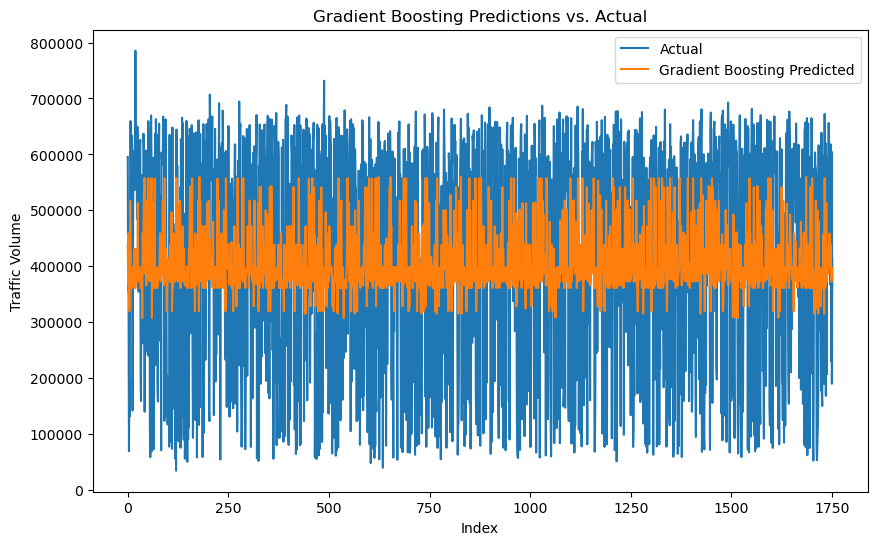

In [42]:
import matplotlib.pyplot as plt

# Assuming you have an array of indices or use a simple range for the index
indices = range(len(y_test))  # Simple range index if no specific index is available

plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual')
plt.plot(indices, gb_y_pred, label='Gradient Boosting Predicted')
plt.xlabel('Index')
plt.ylabel('Traffic Volume')
plt.title('Gradient Boosting Predictions vs. Actual')
plt.legend()
plt.show()


In [45]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming X_train is your training feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Performance on Simulated New Data:
Root Mean Squared Error: 500909.34838991263
Mean Absolute Error: 499088.90039311786
R-squared (R2): -179221552.78886208


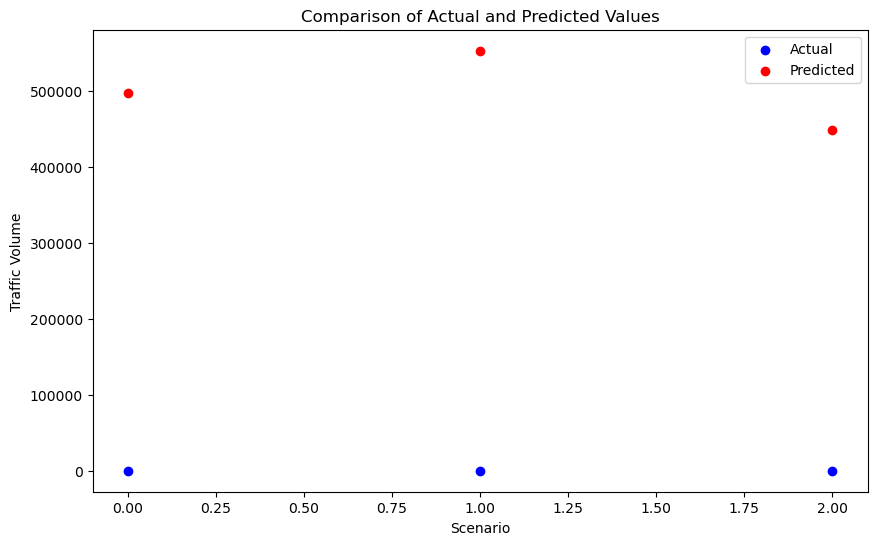

In [46]:
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the trained model
model_path = 'gradient_boosting_model.pkl'
loaded_model = joblib.load(model_path)

# Generate simulated new data
# Assuming features are: avg_rain, max_temp, min_temp
new_data = np.array([
    [0.3, 22, 15],  # Example scenario 1
    [0.0, 30, 20],  # Example scenario 2
    [0.1, 18, 12]   # Example scenario 3
])

# Scale the new data using the same scaler used for training data
scaler_path = 'scaler.pkl'  # Assuming you saved your scaler too
scaler = joblib.load(scaler_path)
new_data_scaled = scaler.transform(new_data)

# Predict using the loaded model
predictions = loaded_model.predict(new_data_scaled)

# Assuming you have some actual labels for demonstration (these are dummy)
actual_labels = np.array([150, 240, 180])  # These should be the actual traffic volumes for the scenarios

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(actual_labels, predictions))
mae = mean_absolute_error(actual_labels, predictions)
r2 = r2_score(actual_labels, predictions)

print("Performance on Simulated New Data:")
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual_labels)), actual_labels, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Scenario')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [52]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch
import numpy as np

# Assuming 'train_data' and 'test_data' are PySpark DataFrames
# Convert PySpark DataFrame to Pandas DataFrame
train_pd = train_data.toPandas()
test_pd = test_data.toPandas()

# Extract features and labels
# Here we use 'avg_rain', 'max_temp', and 'min_temp' as features and 'total_traffic' as the label
train_features = train_pd[['avg_rain', 'max_temp', 'min_temp']].values
train_labels = train_pd['total_traffic'].values
test_features = test_pd[['avg_rain', 'max_temp', 'min_temp']].values
test_labels = test_pd['total_traffic'].values

# Define the model builder function for the tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(train_features.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define the tuner using RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='traffic_volume_prediction'
)

# Perform the hyperparameter search
tuner.search(x=train_features, y=train_labels, epochs=5, validation_data=(test_features, test_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 03s]
val_loss: 196530367146.66666

Best val_loss So Far: 196247781376.0
Total elapsed time: 00h 00m 17s


/Users/raphaelbyrne/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert PySpark DataFrame to Pandas DataFrame first
test_pd = test_data.toPandas()

# Extract features and labels for testing
test_features = test_pd[['avg_rain', 'max_temp', 'min_temp']].values
test_labels = test_pd['total_traffic'].values

# Evaluate the tuned Keras model
tuned_model_eval = best_model.evaluate(test_features, test_labels, verbose=0)

# Compute RMSE and MAE for the Keras model
tuned_model_rmse = np.sqrt(tuned_model_eval[0])
tuned_model_mae = tuned_model_eval[1]

print("Tuned Model - RMSE:", tuned_model_rmse, ", MAE:", tuned_model_mae)

print("Linear Regression Model - RMSE:", test_results.rootMeanSquaredError, ", MAE:", test_results.meanAbsoluteError)

Tuned Model - RMSE: 442808.50289939105 , MAE: 390565.21875
Linear Regression Model - RMSE: 203247.2598199285 , MAE: 178040.11813301634


In [56]:
best_model.save("traffic_volume_prediction_model.h5")

In [62]:
import tensorflow as tf

# Export as TensorFlow SavedModel for further compatibility
tf.saved_model.save(best_model, "traffic_volume_prediction_model_saved_model")

INFO:tensorflow:Assets written to: traffic_volume_prediction_model_saved_model/assets


INFO:tensorflow:Assets written to: traffic_volume_prediction_model_saved_model/assets
